In [3]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [8]:
def potential_energy_surface(symbols, bond_lengths):
    """
    Calculates the molecular energy over various bond lenghts(AKA the potential energy suface) using the Hartree-Fock method.
    
    Args: 
        symbols (list(string)): A list of atomic symbols that comprise the diatomic molecule of interest.
        bond_lengths (numpy.tensor): Bond lengths to calculate the energy over.
        
    Returns:
        hf_energies(numpy.tensor): The Hartree Fock energies at every bond length value.
    """
    hf_energies = []

    for r in bond_lengths:
        # Define the molecule at a specific bond length
        geometry = np.array([[0, 0, -r / 2], [0, 0, r / 2]], requires_grad = False)

        mol = qml.qchem.Molecule(symbols, geometry)

        # Define the Hartree-Fock device
        # dev = qml.device("default.qubit", wires = 2)

        # Define the Hartree-Fock quantum function
        hf = qml.qchem.hf_energy

        # Calculate the Hartree-Fock energy
        hf_energies.append(hf(mol)())

    return np.array(hf_energies)

def ground_energy(hf_energies):
    """Finds the minimum energy of a molecule given its potential energy surface.
    
    Args: 
        hf_energies (numpy.tensor): 

    Returns:
        (float): The minumum energy in units of hartrees.
    """

    ind = np.argmin(hf_energies)
    return hf_energies[ind]

def reaction():
    """Calculates the energy of the reactants, the activation energy, and the energy of 
    the products in that order.

    Returns:
        (numpy.tensor): [E_reactants, E_activation, E_products]
    """
    molecules = {
        "H2": 
            {"symbols": ["H", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(0.5, 9.3, 0.3)}, 
        "Li2": 
            {"symbols": ["Li", "Li"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(3.5, 8.3, 0.3)}, 
        "LiH": 
            {"symbols": ["Li", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(2.0, 6.6, 0.3)}
    }


    for molecule in molecules.keys():
        hf_energies = potential_energy_surface(molecules[molecule]["symbols"], molecules[molecule]["bond lengths"])
        molecules[molecule]["E0"] = ground_energy(hf_energies)
        molecules[molecule]["E_dissociation"] = np.abs(hf_energies[-1] - molecules[molecule]["E0"])
        # populate each molecule's E0 and E_dissociation values

    # Calculate the following and don't forget to balance the chemical reaction!
    E_reactants = molecules["H2"]["E0"] + molecules["Li2"]["E0"]
    E_activation = molecules["H2"]["E_dissociation"] + molecules["Li2"]["E_dissociation"]
    E_products = 2 * molecules["LiH"]["E0"]

    return np.array([E_reactants, E_activation, E_products])

print(reaction())
# print(potential_energy_surface(["H", "H"], np.arange(0.3, 9.3, 0.3)))

[-15.7553572    0.64935631 -15.72653446]


In [16]:
E = 1.835e+22 / 6.022e+23
print(E)

.7553572 - .72653446

.0288227 * 6.022e+23

0.030471604118233145


1.7357029940000002e+22

In [12]:
molecules = {
        "H2": 
            {"symbols": ["H", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(0.5, 9.3, 0.3)}, 
        "Li2": 
            {"symbols": ["Li", "Li"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(3.5, 8.3, 0.3)}, 
        "LiH": 
            {"symbols": ["Li", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(2.0, 6.6, 0.3)}
} 


molecules["H2"]["E0"] = 3.0

print(molecules["H2"]["E0"])

3.0


[-0.40332644 -0.94730793 -1.0945641  -1.11671433 -1.09200585 -1.0491709
 -0.99964323 -0.94904315 -0.90060359 -0.85609692 -0.81634416 -0.78156784
 -0.75161246 -0.72609682 -0.70453368 -0.68641593 -0.67126398 -0.65864203
 -0.64815813 -0.63946079 -0.63223745 -0.626215   -0.62116033 -0.61687936
 -0.6132142  -0.6100389  -0.6072544  -0.6047836  -0.60256683 -0.60055796] -1.1167143252241287 -0.4033264393496778 -0.6005579550476399


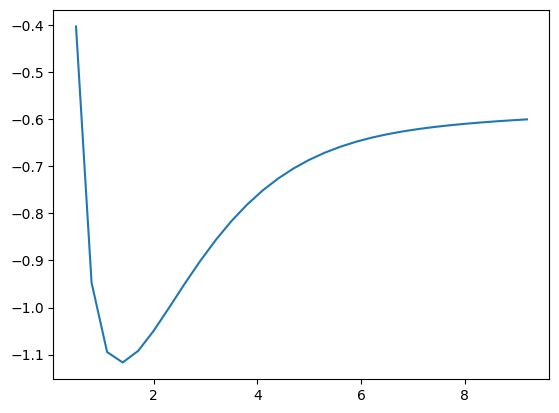

In [13]:
hf_energies = potential_energy_surface(molecules["H2"]["symbols"], molecules["H2"]["bond lengths"])

print(hf_energies, hf_energies[np.argmin(hf_energies)], hf_energies[np.argmax(hf_energies)], hf_energies[-1])

plt.plot(molecules["H2"]["bond lengths"], hf_energies)

[-14.5925228  -14.61081659 -14.62371023 -14.63206845 -14.63678179
 -14.63864288 -14.63831007 -14.63631185 -14.63306613 -14.62890221
 -14.62408026 -14.61880686 -14.61324678 -14.60753179 -14.60176725
 -14.5960372  -14.50544293] -14.638642875212248 -14.505442931370927 -14.505442931370927


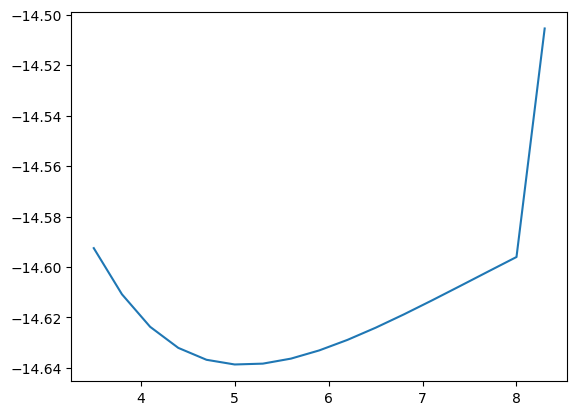

In [14]:
hf_energies = potential_energy_surface(molecules["Li2"]["symbols"], molecules["Li2"]["bond lengths"])

print(hf_energies, hf_energies[np.argmin(hf_energies)], hf_energies[np.argmax(hf_energies)], hf_energies[-1])

plt.plot(molecules["Li2"]["bond lengths"], hf_energies)

[-7.79355424 -7.83906835 -7.85905916 -7.86326723 -7.85754042 -7.84556536
 -7.82973405 -7.81162431 -7.79229566 -7.77248337 -7.75272534 -7.73343768
 -7.71495082 -7.69752046 -7.681328   -7.66648211] -7.863267229642519 -7.6664821149010205 -7.6664821149010205


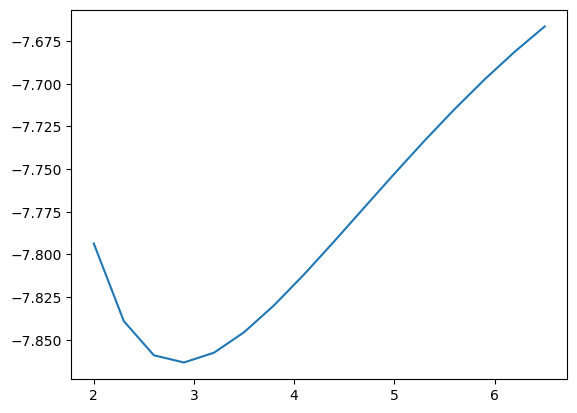

In [15]:
hf_energies = potential_energy_surface(molecules["LiH"]["symbols"], molecules["LiH"]["bond lengths"])

print(hf_energies, hf_energies[np.argmin(hf_energies)], hf_energies[np.argmax(hf_energies)], hf_energies[-1])

plt.plot(molecules["LiH"]["bond lengths"], hf_energies)

In [ ]:
def circuit(oracle):
    qml.Oracle(wires = [0, 1, 2])

In [37]:
import json
import pennylane as qml
import pennylane.numpy as np

def potential_energy_surface(symbols, bond_lengths):
    """Calculates the molecular energy over various bond lengths (AKA the 
    potential energy surface) using the Hartree Fock method.
    
    Args:
        symbols (list(string)): 
            A list of atomic symbols that comprise the diatomic molecule of interest.
        bond_lengths (numpy.tensor): Bond lengths to calculate the energy over.

        
    Returns:
        hf_energies (numpy.tensor): 
            The Hartree Fock energies at every bond length value.
    """


    hf_energies = []

    for r in bond_lengths:
        geometry = np.array([[0, 0, -r/2], [0, 0, r/2]], requires_grad = False)
        mol = qml.qchem.Molecule(symbols, geometry)
        hf = qml.qchem.hf_energy
        hf_energies.append(hf(mol)())

    return np.array(hf_energies)


def ground_energy(hf_energies):
    """Finds the minimum energy of a molecule given its potential energy surface.
    
    Args: 
        hf_energies (numpy.tensor): 

    Returns:
        (float): The minumum energy in units of hartrees.
    """

    ind = np.argmin(hf_energies)
    return hf_energies[ind]

def reaction():
    """Calculates the energy of the reactants, the activation energy, and the energy of 
    the products in that order.

    Returns:
        (numpy.tensor): [E_reactants, E_activation, E_products]
    """
    molecules = {
        "H2": 
            {"symbols": ["H", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(0.5, 9.3, 0.3)}, 
        "Li2": 
            {"symbols": ["Li", "Li"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(3.5, 8.3, 0.3)}, 
        "LiH": 
            {"symbols": ["Li", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(2.0, 6.6, 0.3)}
    }


    for molecule in molecules.keys():
        hf_energies = potential_energy_surface(molecules[molecule]["symbols"], molecules[molecule]["bond lengths"])
        molecules[molecule]["E0"] = ground_energy(hf_energies)
        molecules[molecule]["E_dissociation"] = (-1)*hf_energies[-1]

    # Calculate the following and don't forget to balance the chemical reaction!
    E_reactants = molecules["H2"]["E0"] + molecules["Li2"]["E0"]
    E_activation = -E_reactants + molecules["H2"]["E_dissociation"] + molecules["Li2"]["E_dissociation"]
    E_products = 2*molecules["LiH"]["E0"]

    return np.array([E_reactants, E_activation, E_products])


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    output = reaction().tolist()
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(solution_output, expected_output, rtol=1e-3)

print(reaction())

[-15.7553572   30.86135809 -15.72653446]


In [36]:
import pennylane as qml
import pennylane.numpy as np

def circuit(oracle):
    """The circuit to find if the Bitland Kingdom was in danger.
    You can query the oracle by calling oracle(wires=[0, 1, 2])."""
    
    qml.Hadamard(0)
    qml.Hadamard(1)

    oracle(wires = [0, 1, 2])

    qml.CNOT(wires = [0, 1])
    qml.Hadamard(0)
    qml.CNOT(wires = [1, 2])
    qml.CNOT(wires = [0, 1])


# These functions are responsible for testing the solution.

def oracle_maker():
    # States order: |0> , |1>, -|0>, -|1>

    indx = [[0, 0], [1, 0], [1, 1], [0, 1]]

    # Village 00 -> |0>
    # Village 10 -> |1>
    # Village 11 -> -|0>
    # Village 01 -> -|1>

    np.random.shuffle(indx)

    indices_00 = [index for index, value in enumerate(indx) if value == [0, 0]]
    indices_11 = [index for index, value in enumerate(indx) if value == [1, 1]]

    if set([indices_00[0], indices_11[0]]) == set([0, 1]) or set([indices_00[0], indices_11[0]]) == set([2, 3]):
        target = 0
    else:
        target = 1

    def oracle(wires):

        class op(qml.operation.Operation):
            num_wires = 3
            grad_method = None

            def __init__(self, wires, id=None):
                super().__init__(wires=wires, id=id)

            @property
            def num_params(self):
                return 0

            @staticmethod
            def compute_decomposition(wires):
                wires_input = wires[:2]
                wire_output = wires[2]

                ops = []
                ops.append(qml.ctrl(qml.PauliX(wires=wire_output), control=wires_input, control_values=indx[1]))

                ops.append(
                    qml.ctrl(qml.GlobalPhase(np.pi, wires=wire_output), control=wires_input, control_values=indx[2]))

                ops.append(qml.ctrl(qml.PauliX(wires=wire_output), control=wires_input, control_values=indx[3]))
                ops.append(
                    qml.ctrl(qml.GlobalPhase(np.pi, wires=wire_output), control=wires_input, control_values=indx[3]))

                return ops

        return op(wires=wires)

    return oracle, target


def run(case: str) -> str:
    return "No output"


def check(have: str, want: str) -> None:
    for _ in range(100):
        oracle, target = oracle_maker()

        dev = qml.device("default.qubit", wires=3)

        @qml.qnode(dev)
        def test_circuit():
            circuit(oracle)
            return qml.probs(wires=2)

        test_circuit()
        assert [op.name for op in test_circuit.tape.operations].count("op") == 1, "You can use the oracle once."

        assert np.isclose(test_circuit()[1], target), "Wrong answer!"


# These are the public test cases
test_cases = [
    ('No input', 'No output')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...


AssertionError: Wrong answer!

In [35]:
dev = qml.device("default.qubit")

@qml.qnode(dev)
def circuit():
    return qml.expval(qml.PauliZ(0)@qml.PauliZ(1))

print(qml.draw(circuit)())

0: ───┤  <Z>


In [39]:
np.eye(2)

tensor([[1., 0.],
        [0., 1.]], requires_grad=True)

In [40]:
H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])

# 8개 큐비트에 각각 Hadamard 게이트를 적용한 행렬 생성
U_1qubit = np.kron(H, np.eye(2))
U_2qubit = np.kron(H, H)
U_3qubit = np.kron(H, np.kron(H, H))
U_4qubit = np.kron(H, np.kron(H, np.kron(H, H)))

# 모든 큐비트에 적용한 유니터리 행렬
U = np.kron(U_4qubit, U_4qubit)

print(U)

[[ 0.0625  0.0625  0.0625 ...  0.0625  0.0625  0.0625]
 [ 0.0625 -0.0625  0.0625 ... -0.0625  0.0625 -0.0625]
 [ 0.0625  0.0625 -0.0625 ...  0.0625 -0.0625 -0.0625]
 ...
 [ 0.0625 -0.0625  0.0625 ... -0.0625  0.0625 -0.0625]
 [ 0.0625  0.0625 -0.0625 ...  0.0625 -0.0625 -0.0625]
 [ 0.0625 -0.0625 -0.0625 ... -0.0625 -0.0625  0.0625]]
